In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

Original image shape: (512, 512)


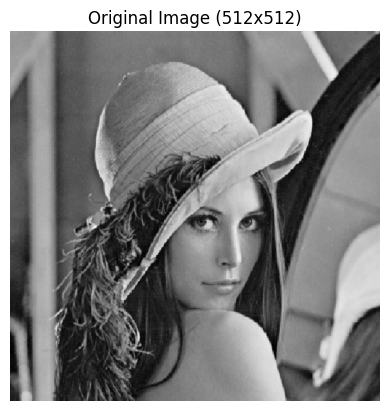

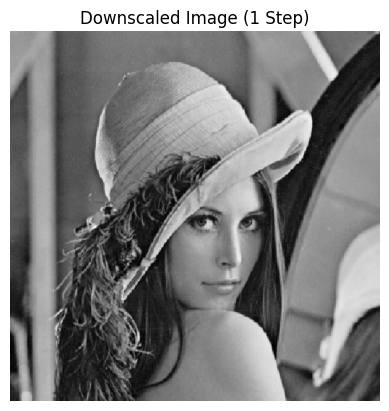

scaled image shape: (256, 256)


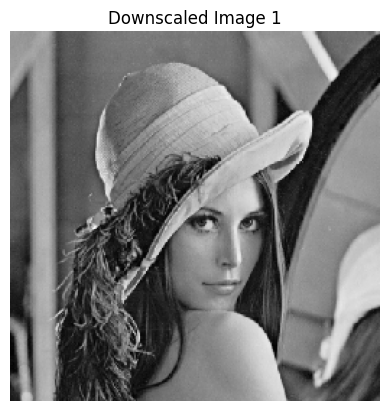

scaled image shape: (128, 128)


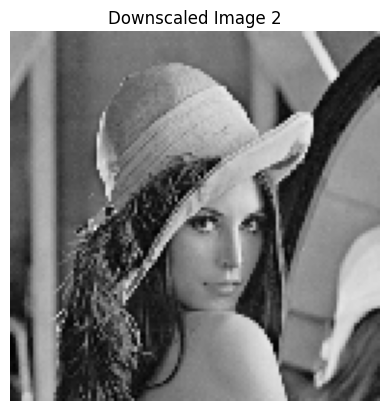

scaled image shape: (64, 64)


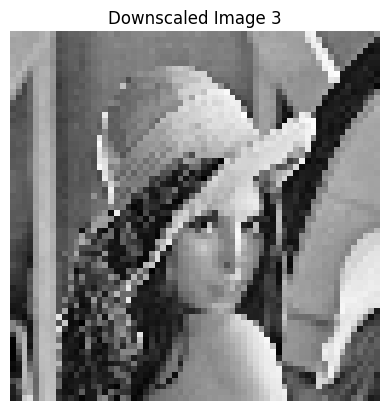

scaled image shape: (32, 32)


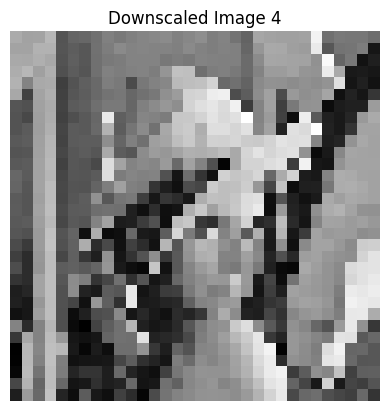

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = './lena2.png'


image = Image.open(image_path).convert('L')
image = np.array(image)


if image.shape != (512, 512):
    image = np.array(Image.fromarray(image).resize((512, 512), Image.Resampling.LANCZOS))

print(f"Original image shape: {image.shape}")


plt.imshow(image, cmap='gray')
plt.title("Original Image (512x512)")
plt.axis('off')
plt.show()


def downscale_image(image):
    new_height = image.shape[0] // 2
    new_width = image.shape[1] // 2
    downscaled_image = np.zeros((new_height, new_width), dtype=np.uint8)
    for i in range(new_height):
        for j in range(new_width):
            downscaled_image[i, j] = image[i*2, j*2] 
    return downscaled_image


image_resized = image
plt.imshow(image_resized, cmap='gray')
plt.title("Downscaled Image (1 Step)")
plt.axis('off')
plt.show()

for i in range(4):
    image_resized = downscale_image(image_resized)
    print(f"scaled image shape: {image_resized.shape}")
    # image_resized = np.array(Image.fromarray(image_resized).resize((512, 512), Image.Resampling.LANCZOS))  
    plt.imshow(image_resized, cmap='gray')
    plt.title(f"Downscaled Image {i+1}")
    plt.axis('off')
    plt.show()


plt.tight_layout()
plt.show()


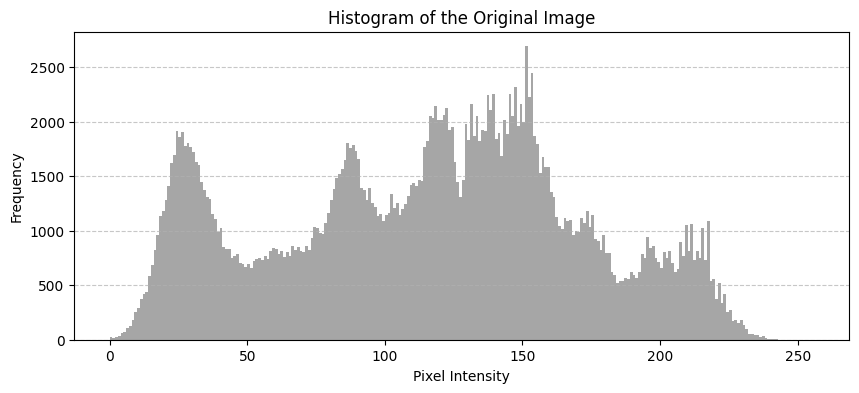

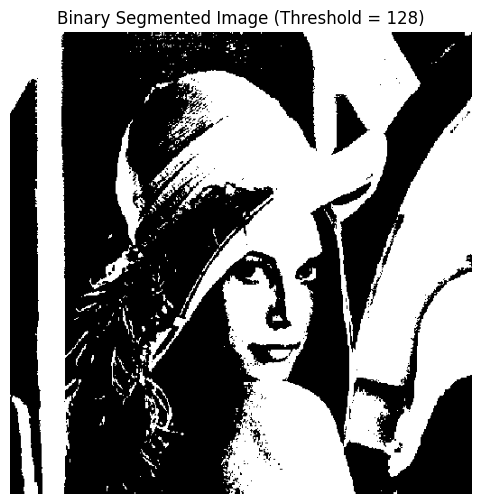

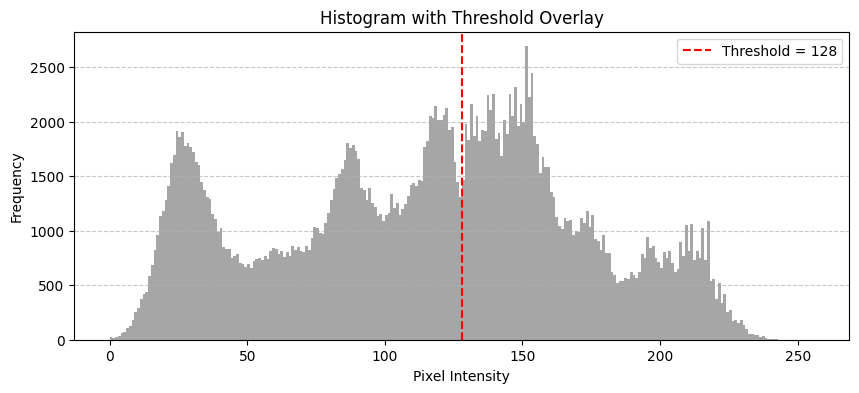

In [5]:
plt.figure(figsize=(10, 4))
plt.hist(image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title("Histogram of the Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

binary_image = (image > threshold_value).astype(np.uint8) * 255

plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title(f"Binary Segmented Image (Threshold = {threshold_value})")
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f"Threshold = {threshold_value}")
plt.title("Histogram with Threshold Overlay")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
